# *개인 데이터분석*   <흡연 민원 분석 및 단속시간 조정>


## 금연구역 데이터

In [ ]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [ ]:
data = pd.read_csv('D:/개인인천시청/데이터/전국_금연구역.csv',encoding = 'euc-kr')  #금연구역

In [ ]:
data.head()

,금연구역명,금연구역범위상세,시도명,시군구명,금연구역구분,금연구역지정근거명,금연구역면적,위반과태료,위반신고전화번호,소재지도로명주소,소재지지번주소,관리기관명,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,어미향,건물 내 금연,전라남도,목포시,일반음식점,국민건강증진법,NaN,100000.0,061-277-4000,"전라남도 목포시 동명로 19, 1층 (산정동)",NaN,전라남도 목포시,34.789031,126.395593,2020-10-08,4800000,전라남도 목포시
1,지맘대로,건물 내 금연,전라남도,목포시,일반음식점,국민건강증진법,NaN,100000.0,061-277-4000,"전라남도 목포시 동명로 23, 1층 (산정동)",NaN,전라남도 목포시,34.789407,126.395590,2020-10-08,4800000,전라남도 목포시
2,미담,건물 내 금연,전라남도,목포시,일반음식점,국민건강증진법,NaN,100000.0,061-277-4000,"전라남도 목포시 동명로 30, 1층 (산정동)",NaN,전라남도 목포시,34.790081,126.395911,2020-10-08,4800000,전라남도 목포시
3,지니빠,건물 내 금연,전라남도,목포시,일반음식점,국민건강증진법,NaN,100000.0,061-277-4000,"전라남도 목포시 동명로 33 (산정동,1동)",NaN,전라남도 목포시,34.790210,126.395417,2020-10-08,4800000,전라남도 목포시
4,1004의쉼터,건물 내 금연,전라남도,목포시,일반음식점,국민건강증진법,NaN,100000.0,061-277-4000,전라남도 목포시 동명로 34 (산정동),NaN,전라남도 목포시,34.790401,126.395916,2020-10-08,4800000,전라남도 목포시


In [ ]:
data_r = data.replace('일반음식점', '음식점')

In [ ]:
data_r['금연구역구분'].value_counts()

음식점                 10110
버스정류소                4431
어린이집                 2427
버스정류장                1558
의료기관                 1490
                    ...  
일품중화요리                  1
문래주민센터                  1
유원아파트                   1
부안여성농업인센터 알곡어린이집        1
코스트코                    1
Name: 금연구역구분, Length: 583, dtype: int64

#### 해석 : 음식점(일반음식점 + 음식점) 이 10110, 버스정류소가 4431, 어린이집 2427, 버스정류장 1558
이 장소들 주변으로 금연구역 재설치 필요

In [ ]:
data_in = data[data['시도명']=='인천광역시']
data_in.head(2)

data_in = data_in.set_index('시군구명')

,금연구역명,금연구역범위상세,시도명,시군구명,금연구역구분,금연구역지정근거명,금연구역면적,위반과태료,위반신고전화번호,소재지도로명주소,소재지지번주소,관리기관명,위도,경도,데이터기준일자,제공기관코드,제공기관명
601,삼산경찰서(40584),정류소 표지판으로부터 5m이내,인천광역시,부평구,버스정류소,"국민건강증진법 제9조 7항, 인천광역시부평구 간접흡연 피해방지에 관한 조례 제10조",20.0,50000.0,032-509-5082,인천광역시 부평구 굴포로 110(삼산동),인천광역시 부평구 삼산동 441-2,인천광역시 부평구,37.510989,126.733319,2020-10-26,3540000,인천광역시 부평구
602,부평역사박물관(40610),정류소 표지판으로부터 5m이내,인천광역시,부평구,버스정류소,"국민건강증진법 제9조 7항, 인천광역시부평구 간접흡연 피해방지에 관한 조례 제10조",20.0,50000.0,032-509-5082,인천광역시 부평구 굴포로 158(삼산동),NaN,인천광역시 부평구,37.511513,126.738619,2020-10-26,3540000,인천광역시 부평구


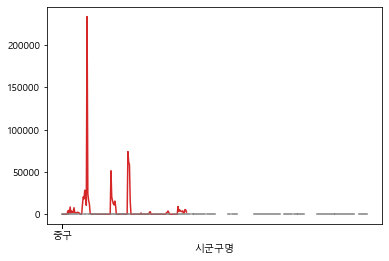

In [ ]:
data_in_group= data_in['금연구역면적'].groupby(data_in['제공기관명']).plot()

In [ ]:
data_mi = data_in[data_in['시군구명']=='미추홀구']
data_mi['금연구역구분'].value_counts()

쉼터       11
택시승강장    11
광장        2
거리        1
Name: 금연구역구분, dtype: int64

In [ ]:
data_mi.to_csv('D:/개인인천시청/데이터/미추홀구_금연구역.csv', encoding = 'euc-kr')

## 교육시설물 데이터

In [ ]:
data_a = pd.read_csv('D:/개인인천시청/데이터/교육시설물 데이터/수정/인천광역시 미추홀구_초등학교.csv', encoding='cp949')  #초등
data_b = pd.read_csv('D:/개인인천시청/데이터/교육시설물 데이터/수정/인천광역시 미추홀구_중학교.csv',encoding='cp949') 
data_c = pd.read_csv('D:/개인인천시청/데이터/교육시설물 데이터/수정/인천광역시 미추홀구_고등학교.csv') 

In [ ]:
print('초등:', len(data_a), '  중:', len(data_b), '  고:', len(data_c))

초등: 23   중: 12   고: 17


In [ ]:
data_a = data_a.replace('\t', '')

In [ ]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록군구    23 non-null     object 
 1   학교명     23 non-null     object 
 2   우편번호    23 non-null     int64  
 3   도로명주소   23 non-null     object 
 4   위도      23 non-null     float64
 5   경도      23 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ KB


In [ ]:
data_a['구분'] = '초등학교'
data_b['구분'] = '중학교'
data_c['구분'] = '고등학교'

In [ ]:
data_ed = pd.concat([data_a,data_b,data_c])

In [ ]:
data_ed.to_csv('D:/개인인천시청/데이터/미추홀구_교육시설물총합.csv', encoding = 'euc-kr', index = False)

## 유동인구 데이터

In [ ]:
data_p1 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202002.csv',encoding = 'euc-kr') 
data_p2 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202003.csv',encoding = 'euc-kr') 
data_p3 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202004.csv',encoding = 'euc-kr') 
data_p4 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202005.csv',encoding = 'euc-kr') 
data_p5 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202006.csv',encoding = 'euc-kr') 
data_p6 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202007.csv',encoding = 'euc-kr') 
data_p7 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202008.csv',encoding = 'euc-kr') 
data_p8 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202009.csv',encoding = 'euc-kr') 
data_p9 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202010.csv',encoding = 'euc-kr') 
data_p10 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202011.csv',encoding = 'euc-kr') 
data_p11 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202012.csv',encoding = 'euc-kr') 
data_p12 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202101.csv',encoding = 'euc-kr') 
data_p13 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202102.csv',encoding = 'euc-kr') 
data_p14 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202103.csv',encoding = 'euc-kr') 
data_p15 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202104.csv',encoding = 'euc-kr') 
data_p16 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202105.csv',encoding = 'euc-kr') 
data_p17 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202106.csv',encoding = 'euc-kr') 
data_p18 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202107.csv',encoding = 'euc-kr') 
data_p19 = pd.read_csv('D:/개인인천시청/데이터/유동인구 데이터/pop_202108.csv',encoding = 'euc-kr') 

In [ ]:
'''
for i in range(1,20):
    pf'{i}'= data_pf'{i}'[data_pf'{i}'['GU_NAME']=='미추홀구']
'''

"\nfor i in range(1,20):\n    pf'{i}'= data_pf'{i}'[data_pf'{i}'['GU_NAME']=='미추홀구']\n"

In [ ]:
p1= data_p1[data_p1['GU_NAME']=='미추홀구']
p2= data_p2[data_p2['GU_NAME']=='미추홀구']
p3= data_p3[data_p3['GU_NAME']=='미추홀구']
p4= data_p4[data_p4['GU_NAME']=='미추홀구']
p5= data_p5[data_p5['GU_NAME']=='미추홀구']
p6= data_p6[data_p6['GU_NAME']=='미추홀구']
p7= data_p7[data_p7['GU_NAME']=='미추홀구']
p8= data_p8[data_p8['GU_NAME']=='미추홀구']
p9= data_p9[data_p9['GU_NAME']=='미추홀구']
p10= data_p10[data_p10['GU_NAME']=='미추홀구']
p11= data_p11[data_p11['GU_NAME']=='미추홀구']
p12= data_p12[data_p12['GU_NAME']=='미추홀구']
p13= data_p13[data_p13['GU_NAME']=='미추홀구']
p14= data_p14[data_p14['GU_NAME']=='미추홀구']
p15= data_p15[data_p15['GU_NAME']=='미추홀구']
p16= data_p16[data_p16['GU_NAME']=='미추홀구']
p17= data_p17[data_p17['GU_NAME']=='미추홀구']
p18= data_p18[data_p18['GU_NAME']=='미추홀구']
p19= data_p19[data_p19['GU_NAME']=='미추홀구']

In [ ]:
pc1= pd.concat([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10])
pc2= pd.concat([p11,p12,p13,p14,p15,p16,p17,p18,p19])
pc=pd.concat([pc1,pc2])
pc.head()

,Unnamed: 0,TD_YMD,TIME,AGE,HCODE,H_POP,W_POP,V_POP,DO_NAME,GU_NAME,HDONG_NAME,GU_CODE,DO_CODE,area,length
23,24,20200201,0,9,2817751000,686.0,0,72.0,인천광역시,미추홀구,숭의2동,28177,28,5.334553e+05,3002.367736
24,25,20200201,0,9,2817752000,510.0,0,119.0,인천광역시,미추홀구,숭의1.3동,28177,28,6.946117e+05,5278.986583
25,26,20200201,0,9,2817753000,951.0,0,101.0,인천광역시,미추홀구,숭의4동,28177,28,7.839293e+05,3790.861449
26,27,20200201,0,9,2817754000,966.0,0,0.0,인천광역시,미추홀구,용현1.4동,28177,28,1.268936e+06,7272.740308
27,28,20200201,0,9,2817755000,1114.0,8,84.0,인천광역시,미추홀구,용현2동,28177,28,6.368437e+05,3595.524127


In [ ]:
len(pc)

4078368

pc_grouped_POP= pc['HDONG_NAME'].groupby([pc['H_POP'], pc['W_POP'], pc['V_POP']]) # 인구
pc_grouped_POP= pc_grouped_POP.sum().sort_values(ascending = False)
pc_grouped_POP= pd.DataFrame(pc_grouped_POP, columns=['H_POP', 'W_POP', 'V_POP']).reset_index()

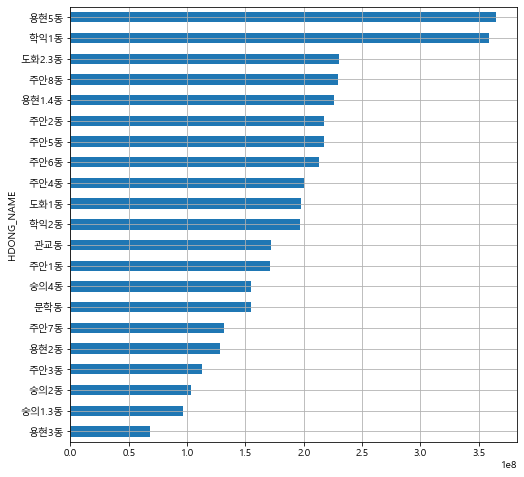

In [ ]:
pc_grouped_HPOP= pc['H_POP'].groupby(pc['HDONG_NAME']) #주거인구
pc_grouped_HPOP= pc_grouped_HPOP.sum().sort_values(ascending = True)
pc_grouped_HPOP= pd.DataFrame(pc_grouped_HPOP, columns=['H_POP'])
pc_grouped_HPOP['H_POP'].plot(kind='barh', grid = True, figsize = (8,8))
plt.show()

###### 용현 5동, 학익1동 >>>>>> 도화2.3동,주안8동, 용현1.4동


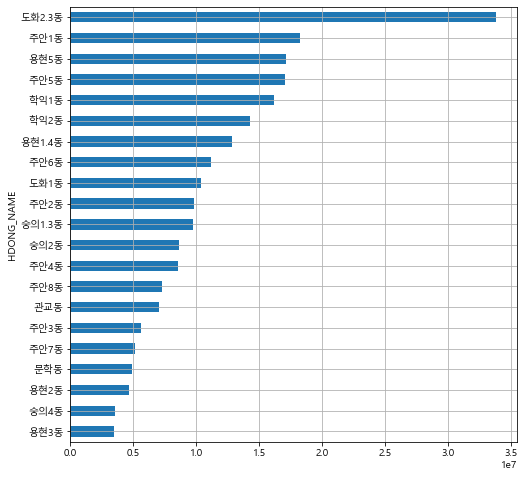

In [ ]:
pc_grouped_W_POP= pc['W_POP'].groupby(pc['HDONG_NAME']) #직장인구
pc_grouped_W_POP= pc_grouped_W_POP.sum().sort_values(ascending = True)
pc_grouped_W_POP= pd.DataFrame(pc_grouped_W_POP, columns=['W_POP'])
pc_grouped_W_POP['W_POP'].plot(kind='barh', grid = True, figsize = (8,8))
plt.show()

###### 도화2.3동 >>>>>>> 주안1동 > 용현5동, 주안5동

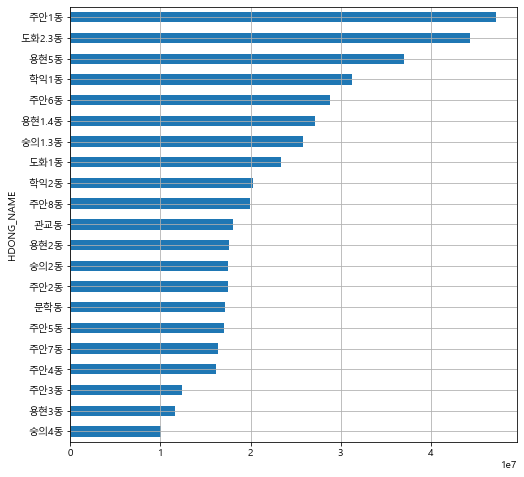

In [ ]:
pc_grouped_V_POP= pc['V_POP'].groupby(pc['HDONG_NAME']) #방문인구
pc_grouped_V_POP= pc_grouped_V_POP.sum().sort_values(ascending = True)
pc_grouped_V_POP= pd.DataFrame(pc_grouped_V_POP, columns=['V_POP'])
pc_grouped_V_POP['V_POP'].plot(kind='barh', grid = True, figsize = (8,8))
plt.show()

######  주안1동 > 주안2.3동 >>> 용현5동 >>> 학익1동

In [ ]:
pc_grouped_HPOP.reset_index()
pc_grouped_W_POP.reset_index()
pc_grouped_V_POP.reset_index()

,HDONG_NAME,V_POP
0,숭의4동,10036200.0
1,용현3동,11586372.0
2,주안3동,12407180.0
3,주안4동,16164833.0
4,주안7동,16341007.0
5,주안5동,17078747.0
6,문학동,17219135.0
7,주안2동,17458241.0
8,숭의2동,17494129.0
9,용현2동,17631706.0


In [ ]:
pc_concat = pd.concat([pc_grouped_HPOP,pc_grouped_W_POP,pc_grouped_V_POP])
people_mi = pc_concat.groupby('HDONG_NAME').sum()

In [ ]:
np.set_printoptions(precision=6, suppress=True)
 
pd.options.display.float_format = '{:.5f}'.format
pd.reset_option('display.float_format')

######  월 평균 인구이동량

In [ ]:
people_mi['H_POP'] = people_mi['H_POP'] / 17 #기간 : 202002 ~ 202108
people_mi['W_POP'] = people_mi['W_POP'] / 17
people_mi['V_POP'] = people_mi['V_POP'] / 17
people_mi.head()

,H_POP,W_POP,V_POP
HDONG_NAME,,,
관교동,1.010811e+07,4.133853e+05,1.061627e+06
도화1동,1.160390e+07,6.111578e+05,1.374743e+06
도화2.3동,1.353008e+07,1.988844e+06,2.607443e+06
문학동,9.079919e+06,2.883378e+05,1.012890e+06
숭의1.3동,5.688179e+06,5.729066e+05,1.520872e+06


In [ ]:
people_mi.reset_index()
people_mi.to_csv('D:/개인인천시청/데이터/미추홀구_유동인구.csv', encoding = 'euc-kr',index=False)

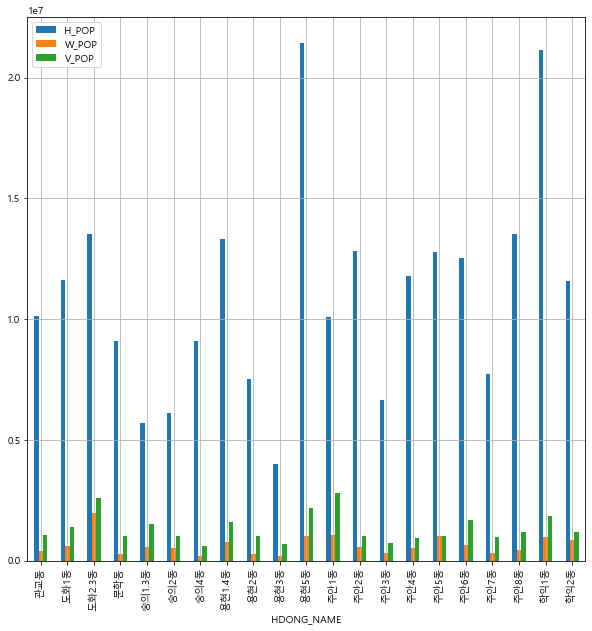

In [ ]:
people_mi.plot(kind='bar', grid = True, figsize = (10,10))
plt.show()

## 금연구역 데이터

In [ ]:
data_x = pd.read_csv('D:/개인인천시청/데이터/미추홀구_금연구역.csv',encoding = 'euc-kr') 
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     int64  
 1   금연구역명       25 non-null     object 
 2   금연구역범위상세    25 non-null     object 
 3   시도명         25 non-null     object 
 4   시군구명        25 non-null     object 
 5   금연구역구분      25 non-null     object 
 6   금연구역지정근거명   25 non-null     object 
 7   금연구역면적      0 non-null      float64
 8   위반과태료       25 non-null     float64
 9   위반신고전화번호    25 non-null     object 
 10  소재지도로명주소    0 non-null      float64
 11  소재지지번주소     25 non-null     object 
 12  관리기관명       25 non-null     object 
 13  위도          5 non-null      float64
 14  경도          5 non-null      float64
 15  데이터기준일자     25 non-null     object 
 16  제공기관코드      25 non-null     int64  
 17  제공기관명       25 non-null     object 
dtypes: float64(5), int64(2), object(11)
memory usage: 3.6+ KB


In [ ]:
data_x['금연구역구분'].value_counts()

쉼터       11
택시승강장    11
광장        2
거리        1
Name: 금연구역구분, dtype: int64

## 민원데이터

In [ ]:
data_mw = pd.read_csv('D:/개인인천시청/데이터/민원 데이터/saeol_minwon_B.csv',encoding = 'euc-kr')
data_mw.head()

,ldadng_ymd,recv_path,minnwon_sj,minwon_cn,process_limit,dept_gubun,dept_name,ans_mod_dtime,민원내용,위치
0,20191030,모바일접수민원,"[생활불편신고]쓰레기 방치, 투기",공원내 흡연 여전히 어르신들은 흡연을 하시네요 지금시간엔 아이들이 한참 공원에서 ...,2019-11-01 18:00,주관,건설교통국 공원녹지과,2019-10-30 17:34,흡연,인천광역시 미추홀구 용현동 14
1,20191031,모바일접수민원,[생활불편신고]기타불편,기타불편 노숙자들 공원에서 흡연 음주 행위인천광역시 미추홀구 숭의동 50-2 부근...,2019-10-31 18:00,주관,복지환경국 복지정책과,2019-10-31 17:23,"흡연, 음주",인천광역시 미추홀구 숭의동 50-2
2,20191031,"이송이관민원 (국민신문고접수, 국민권익위원회)",[이송이관] 간석역 1번출구 흡연 단속 요청,간석역 1번출구 앞 흡연자들 단속 요청 드립니다.전에 있던 흡연 금지 현수막은 없어...,2019-10-31 18:00,주관,보건소 건강증진과,2019-10-31 17:59,흡연,간석역 1번출구
3,20191031,자체접수민원,주안동3동 쓰레기무단투기 그리고 쓰레기분리수거함설치민원,쓰레기무단투기로 인한 cctv 설치요망드립니다치킨박스에 치킨뼈를 담아 빌라에 무단으...,2019-11-06 18:00,주관,주안3동,2019-10-31 18:01,NaN,주안3동
4,20191101,모바일접수민원,[생활불편신고]기타생활불편,기타생활불편 공원에 할머니 할아버지들 계시는분들중공원에 개데리고 출입했다고 무조...,2019-11-05 18:00,주관,건설교통국 공원녹지과,2019-11-01 15:58,NaN,인천광역시 미추홀구 문학동 460


In [ ]:
data_mw